In [1]:
%matplotlib inline
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## 1.ダミーデータの用意

In [2]:
np.random.seed(100)
data_size = 100
x = np.random.randn(data_size)
y = 5*x+10+np.random.randn(data_size)

Text(0,0.5,'y')

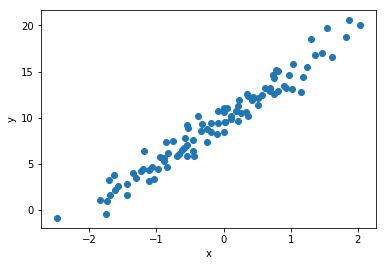

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y)
ax.set_xlabel("x")
ax.set_ylabel("y")

In [17]:
# 残差の二乗和の合計を算出
error = y - (alpha+beta*x)
squre_error = error**2
sum_of_squre_error = np.sum(squre_error)
print("残差の二乗和の合計:{}".format(sum_of_squre_error))

残差の二乗和の合計:113.71604952676256


In [18]:
# 残差の二乗和の合計を算出する関数を作成
def objective_function(alpha,beta):
    error = y -(alpha+beta*x)
    squre_error = error**2
    sum_of_squre_error = np.sum(squre_error)
    return sum_of_squre_error

In [21]:
objective_function(3,10)

8182.380619046215

## 2.勾配降下法によるパラメーターの推定

線形回帰モデルの目的関数は以下の通り。
\begin{equation*}
f(\alpha,\beta) = \sum_{k=1}^{N}(y_i - (\alpha - \beta x_i))^2
\end{equation*}

この目的関数の最小となる$\alpha$と$\beta$を探し出す。
つまり、目的関数を$\alpha$と$\beta$に関してそれぞれ偏微分を行い、傾きを算出をし$\alpha$と$\beta$の適当な初期値から更新をし目的関数が最小となる点を探し出す。

\begin{equation*}
\frac{\partial f}{\partial \alpha} = \sum_{k=1}^{N}-2(y_i - \alpha - \beta x_i)
\\
\frac{\partial f}{\partial \beta} = \sum_{k=1}^{N}-2x_i(y_i - \alpha - \beta x_i)
\end{equation*}

更新式は以下のようになる。

\begin{equation*}
\alpha_{next} = \alpha_{current} - \eta \frac{\partial f}{\partial \alpha}
\\
\beta_{next} = \beta_{current} - \eta \frac{\partial f}{\partial \beta}
\end{equation*}

In [22]:
# alphaとbetaの偏微分を関数化
def alpha_deriv(alpha,beta):
    return (-2.0*(y-alpha - beta*x)).sum()

def beta_deriv(alpha,beta):
    return (-2.0*x*(y-alpha - beta*x)).sum()

In [88]:
def my_linear_reg_gd(init_alpha,init_beta,learning_rate,max_iteration,print_interval=10):
    
    y_score_history = []
    
    # 初期値での残差の二乗和合計を算出する
    first_y_score = objective_function(init_alpha,init_beta)
    y_score_history.append(first_y_score)
    print("init_alpha= {} and init_beta = {}, first y score is {}".format(init_alpha,init_beta,first_y_score))
    
    current_alpha = init_alpha
    current_beta = init_beta
    
    for i in range(max_iteration):
        next_alpha = current_alpha + (-1)*learning_rate*alpha_deriv(current_alpha,current_beta)
        next_beta = current_beta + (-1)*learning_rate*beta_deriv(current_alpha,current_beta)
        
        if abs(current_alpha -  next_alpha) and (current_beta - next_beta) < 0.0001:
            break
        
        current_alpha = next_alpha
        current_beta = next_beta
        # 更新された点での残差の二乗和合計を算出する
        current_y  = objective_function(current_alpha,current_beta)
        y_score_history.append(current_y)
        print("current_alpha:{} | current_beta:{} | current_y:{}".format(current_alpha,current_beta,current_y))
    return y_score_history,current_alpha,current_beta

In [89]:
cost_history,estimated_alpha,estimated_beta = my_linear_reg_gd(init_alpha=10,
                                                              init_beta=10,
                                                              learning_rate = 0.001,
                                                              max_iteration=10)

init_alpha= 10 and init_beta = 10, first y score is 2651.564271549126
current_alpha:10.090116621071013 | current_beta:9.016795140974917 | current_y:1771.3679872510281
current_alpha:10.141726643199027 | current_beta:8.222526438561083 | current_y:1198.9740886577151
current_alpha:10.166467525387727 | current_beta:7.580445802447239 | current_y:825.7043858236327
current_alpha:10.172883655599179 | current_beta:7.061039061821703 | current_y:581.6170952740096
current_alpha:10.167195670442418 | current_beta:6.640585244153664 | current_y:421.5734344089719
current_alpha:10.153885896133131 | current_beta:6.300005984441361 | current_y:316.3595180278828
current_alpha:10.1361427308078 | current_beta:6.023946035643414 | current_y:247.01458609168765
current_alpha:10.116196994491796 | current_beta:5.800037973650132 | current_y:201.1978527309984
current_alpha:10.095575690546973 | current_beta:5.618313802374653 | current_y:170.85483843842158
current_alpha:10.075292756698111 | current_beta:5.47073379003516

Estimated alpha:10.075292756698111
Estimated beta:5.470733790035162


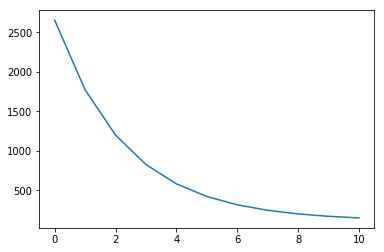

In [91]:
plt.plot(cost_history)
print("Estimated alpha:{}".format(estimated_alpha))
print("Estimated beta:{}".format(estimated_beta))

## 勾配降下法によって求められたalphaとbetaを代入し線形回帰モデルを描画

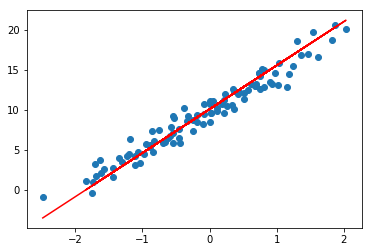

In [95]:
alpha = 10.07
beta = 5.47
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y)
ax.plot(x,beta*x+alpha,"r-")

## 3.確率的勾配降下法によるパラメーターの推定

データ数が多い場合、残差の二乗和を都度計算するのは、現実的ではないので勾配を以下のように定義をします。
\begin{equation*}
\frac{\partial f}{\partial \alpha } \sim -2(y_i - \alpha -  \beta x_i)
\\
\frac{\partial f}{\partial \beta }  \sim -2x_i(y_i - \alpha -  \beta x_i)
\end{equation*}

勾配を計算する際には1つのレコードからxとyを選びます。通常はデータをシャッフルし上から順々に選択する方法をとります。

In [46]:
# 各データ点での合計は算出せず、xとyをindexで数値を取得する
def alpha_deriv_sgd(alpha,beta,idx):
    return (-2.0*(y[idx]-alpha-beta*x[idx]))

def beta_deriv_sgd(alpha,beta,idx):
    return (-2.0*x[idx]*(y[idx]-alpha-beta*x[idx]))

In [92]:
def my_linear_reg_sgd(init_alpha,init_beta,learning_rate,max_epoch,print_interval=100):
    
    # yの値をトラックするためのリストを用意
    cost_history = []
    
    # 初期値での残差二乗和
    first_cost = objective_function(init_alpha,init_beta)
    cost_history.append(first_cost)
    print("init_alpha : {} | init_beta : {} | cost : {}".format(init_alpha,init_beta,first_cost))
    
    current_alpha = init_alpha
    current_beta = init_beta
    
    counter = 1
    
    # 確率的勾配降下法の場合、更新幅が小さくなるのでデータセット自体を繰り返し複数回舐める必要がある
    for i in range(max_epoch):
        
        # 本来であればシャッフルする必要があるが、データを上から見ていく（x.shape[0]）
        for j in range(x.shape[0]):
            next_alpha = current_alpha + (-1)*alpha_deriv_sgd(current_alpha,current_beta,idx=j)*learning_rate
            next_beta = current_beta + (-1)*beta_deriv_sgd(current_alpha,current_beta,idx=j)*learning_rate
            
            next_cost = objective_function(next_alpha,next_beta)
            
            if np.sqrt((current_alpha - next_alpha) **2 + (next_beta - current_beta)**2) < 0.0001:
                break
            
            current_alpha = next_alpha
            current_beta = next_beta
            current_cost = next_cost
            
            cost_history.append(current_cost)
            
            counter += 1
            
            if counter % print_interval == 0:
                print("alpha:{} | beta:{} | cost:{}".format(current_alpha,current_beta,current_cost))

    return cost_history,current_alpha,current_beta

In [93]:
cost_history , estimated_alpha,estimated_beta = my_linear_reg_sgd(init_alpha = 0.0,
                                                                  init_beta = 0.0,
                                                                  learning_rate = 0.01,
                                                                  max_epoch=10,
                                                                  print_interval = 100)

init_alpha : 0.0 | init_beta : 0.0 | cost : 11150.069107539352
alpha:8.560728619405149 | beta:3.8257200536227747 | cost:359.10919852330613
alpha:9.694920074759617 | beta:4.640592000995715 | cost:117.26342934022921
alpha:9.905462711947694 | beta:4.739250169897278 | cost:110.90888885267664
alpha:9.875721919410754 | beta:4.818291454396355 | cost:110.38222469215961
alpha:9.926208425686532 | beta:4.804541719997368 | cost:110.31575276328083
alpha:9.932516249168327 | beta:4.8040541553939295 | cost:110.34284240373502
alpha:9.88979821717773 | beta:4.842556335053224 | cost:110.35095864666063
alpha:9.788243326805587 | beta:4.829461054631125 | cost:111.79334271778859


Estimated alpha:10.044097026402667
Estimated beta:4.764007617871767


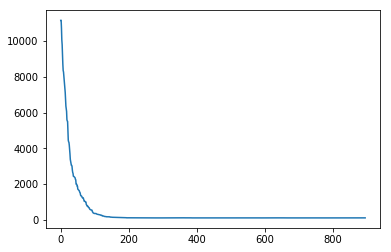

In [94]:
plt.plot(cost_history)
print("Estimated alpha:{}".format(estimated_alpha))
print("Estimated beta:{}".format(estimated_beta))

## 確率的勾配降下法によって求められたalphaとbetaを代入し線形回帰モデルを描画

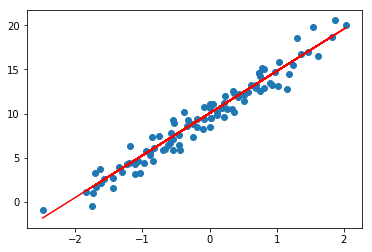

In [96]:
alpha = 10.04
beta = 4.76
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x,y)
ax.plot(x,beta*x+alpha,"r-")